In [8]:
from cmdstanpy import CmdStanModel
import cmdstanpy as cmdst
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [9]:
cmdst.install_cmdstan()

Installing CmdStan version: 2.29.2
Install directory: /home/mat_komp/.cmdstan
CmdStan version 2.29.2 already installed


True

In [10]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [11]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
Widget Javascript not detected.  It may not be installed or enabled properly.


ERROR:cmdstanpy:Error in progress bar initialization:
	'FloatProgress' object has no attribute 'style'
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.


In [12]:
print(result.diagnose())

Processing csv files: /tmp/tmpn6mzfw_w/stan1-20220529150213_1.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_2.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_3.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
224 of 4000 (5.60%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [13]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

Exception ignored in: <function tqdm.__del__ at 0x7f8f9f7a40d0>
Traceback (most recent call last):
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 160, in display
    d = self.format_dict
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1476, in format_dict
    'colour': self.colour}
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 203, in colour
    return self.container.children[-2].style.bar_color
AttributeError: 'FloatProgress' object has no attribute 'style'


<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

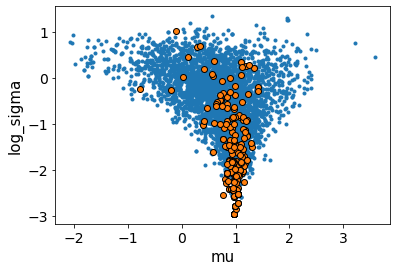

In [14]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [15]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [16]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
print(result.diagnose())

Processing csv files: /tmp/tmpn6mzfw_w/stan1-20220529150213_1.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_2.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_3.csv, /tmp/tmpn6mzfw_w/stan1-20220529150213_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [18]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

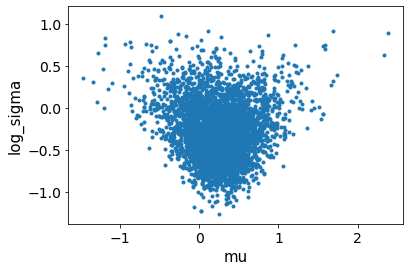

In [19]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [20]:
df = pd.read_csv("coin.csv")

In [21]:
df.head()

,Experiment_Id,Toss_Result
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [22]:
y = df["Toss_Result"]
N = len(y)

In [23]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2.hpp /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2.stan
Warning in '/home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I 

In [24]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01900,0.720,-290.00,-290.00,-290.0,1500.0,25000.0,1.0
theta,0.46,0.00062,0.024,0.42,0.46,0.5,1500.0,26000.0,1.0


In [25]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

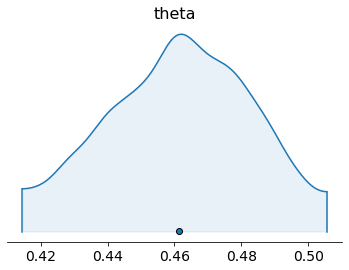

In [26]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [27]:
df2 = pd.read_csv("normal.csv")
df2.head()

,Unnamed: 0,value
0,0,-0.039
1,1,1.085
2,2,-2.794
3,3,1.652
4,4,1.380


In [28]:
y = df2["Unnamed: 0"]
N = len(y)

#### Posterior predictive

In [29]:
model = CmdStanModel(stan_file='stan3.stan')

INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan3.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan3
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan3


In [30]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [31]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-840.0,0.025,1.00,-850.0,-840.0,-840.0,1800.0,5300.0,1.0
mu,9.0,0.022,0.98,7.4,9.0,11.0,2000.0,6000.0,1.0
sigma,21.0,0.011,0.52,20.0,21.0,22.0,2200.0,6500.0,1.0
y_rep[1],8.8,0.340,21.00,-26.0,8.9,44.0,3988.0,11977.0,1.0
y_rep[2],9.5,0.340,22.00,-27.0,9.6,45.0,3986.0,11971.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],8.8,0.340,21.00,-25.0,8.5,44.0,3775.0,11336.0,1.0
y_rep[97],8.5,0.330,21.00,-26.0,8.1,44.0,4262.0,12800.0,1.0
y_rep[98],9.7,0.350,21.00,-26.0,9.9,44.0,3656.0,10979.0,1.0


In [32]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.8/dist-packages/arviz/stats/density_utils.py:249: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


<AxesSubplot:xlabel='y / y_rep'>

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


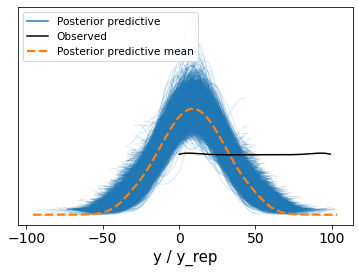

In [33]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [34]:
model = CmdStanModel(stan_file='stan4.stan')

INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4.stan to exe file /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4.hpp /home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4.stan
Warning in '/home/mat_komp/PycharmProjects/DataAnalytics/Lab3/stan4.stan', line 7, column 25: Use
    of the `abs` function with real-valued arguments is deprecated; use
    function `fabs` instead.

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/li

In [35]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,20000.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,19000.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,21255.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,18927.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,19713.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,14527.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,22226.0,1.0


In [37]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

/usr/local/lib/python3.8/dist-packages/arviz/stats/density_utils.py:249: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


<AxesSubplot:xlabel='y / y_prior'>

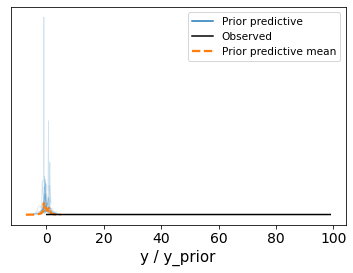

In [38]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

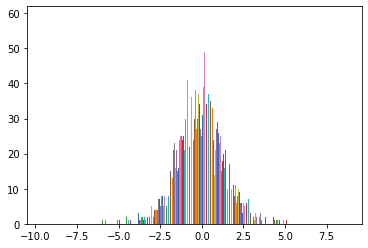

In [39]:
plt.hist(result.stan_variable("y_prior"), bins=160)
plt.show()